In [38]:
# INVOKE THE POWER OF DATA SCIENCE AND VISUALIZATION

In [39]:

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings


In [40]:
df = pd.read_csv("car data.csv")

In [41]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [42]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [44]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [45]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [46]:
df.shape

(301, 9)

In [47]:
df.duplicated().sum()

2

In [48]:
df.drop_duplicates(inplace=True)

In [49]:
df.duplicated().sum()

0

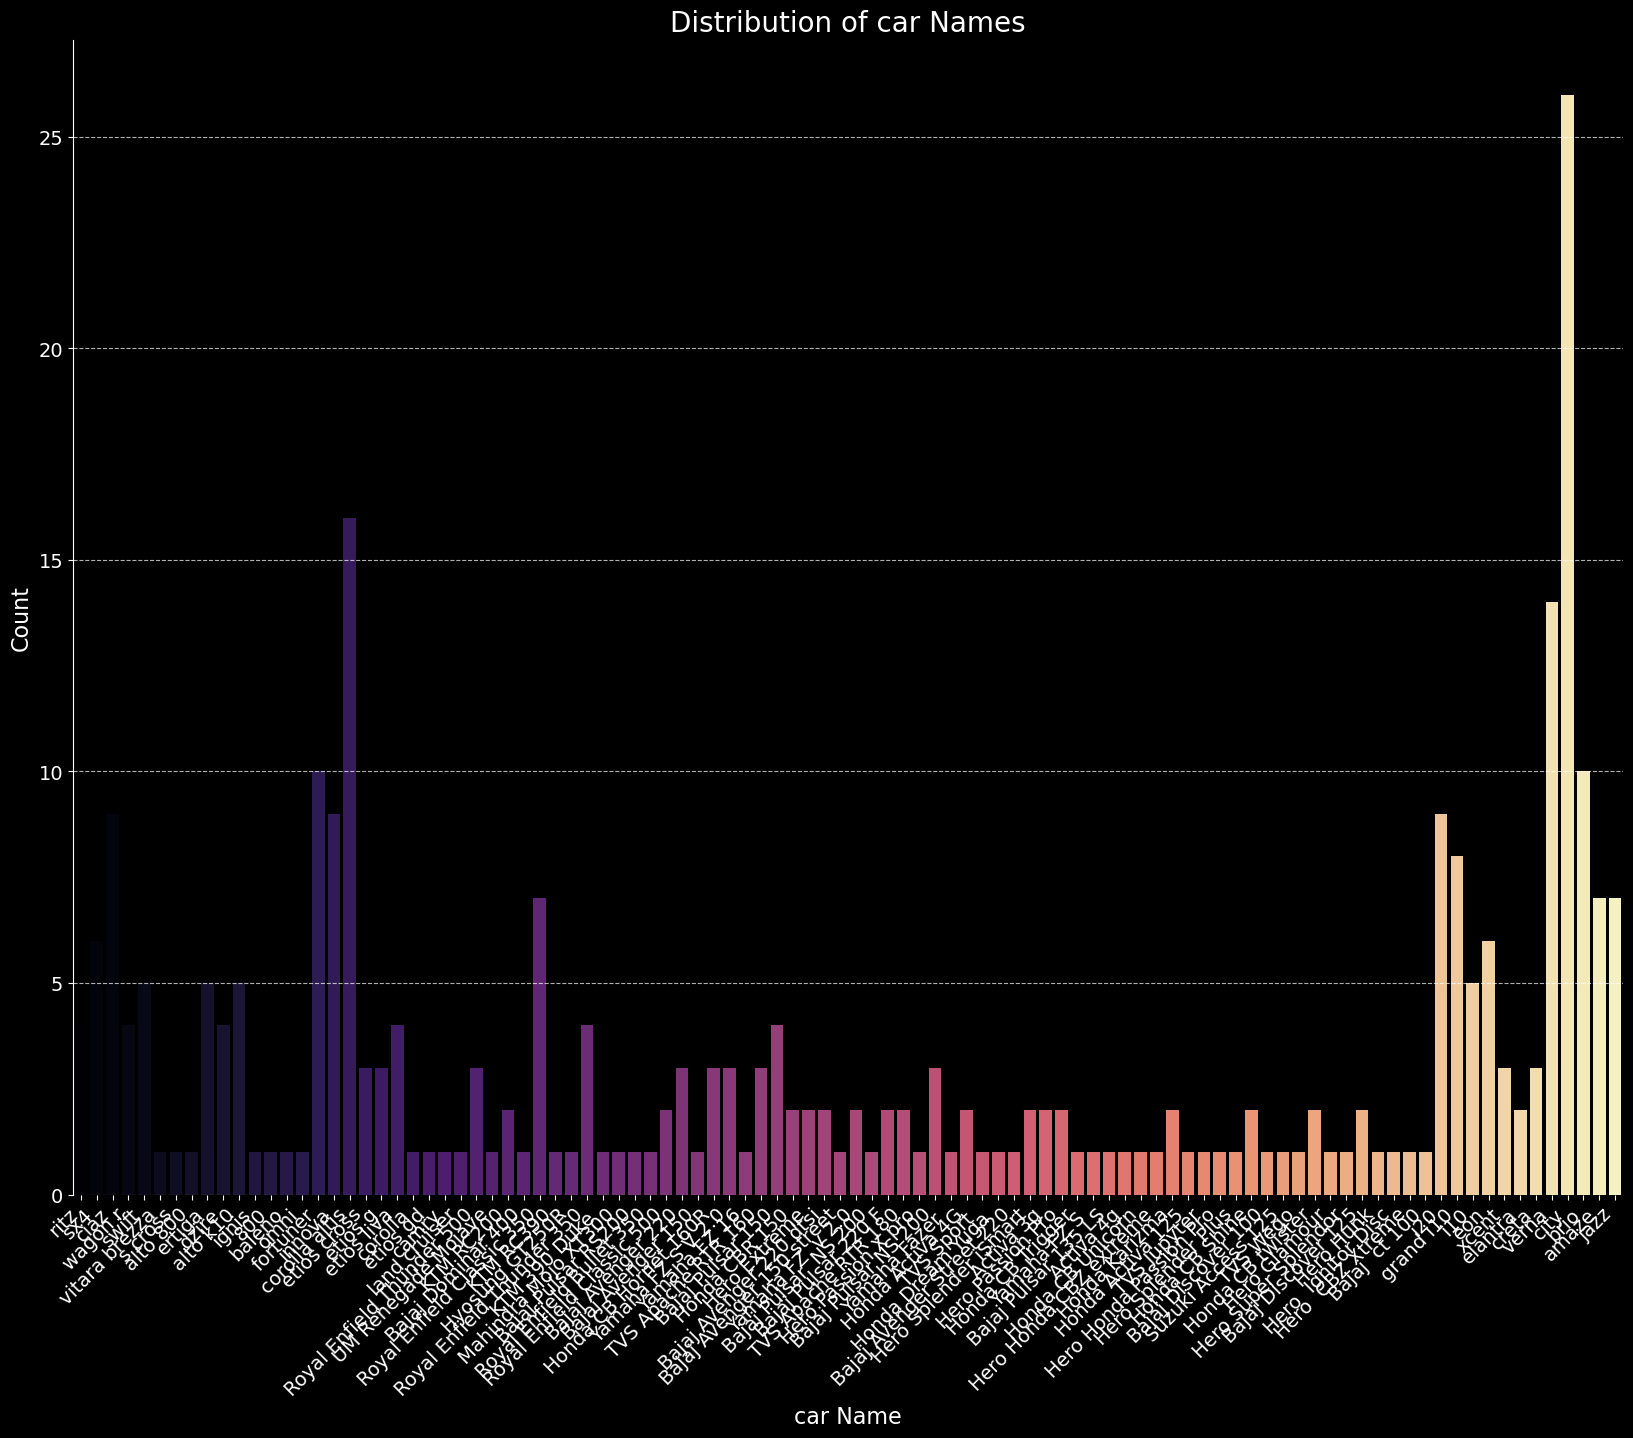

In [50]:
# EMBARK ON VISUAL ODYSSEY THROUGH THE REALMS OF CAR NAMES
plt.figure(figsize=(20,15))
sns.countplot(x="Car_Name",data=df,palette="magma")
plt.title("Distribution of car Names",fontsize=20)
plt.xlabel("car Name",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.xticks(rotation=45,ha="right",fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis="y",linestyle="--",alpha=0.7)
sns.despine(bottom=True)
plt.show()

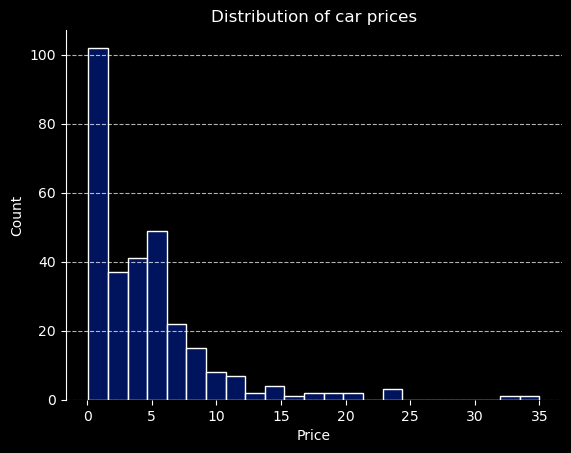

In [51]:
plt.style.use("dark_background")
sns.set_palette("dark")
sns.histplot(df["Selling_Price"])
plt.title("Distribution of car prices",color="white")
plt.xlabel("Price",color="white")
plt.ylabel("Count",color="white")
plt.xticks(color="white")
plt.yticks(color="white")
plt.grid(axis="y",linestyle="--",alpha=0.7)
sns.despine(bottom=True)
plt.show()

In [52]:
from sklearn.model_selection import train_test_split

X = df[["Year", "Driven_kms"]]  # Assuming these are your chosen features
y = df["Selling_Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Model Fitting:

# Create a linear regression model object:

In [54]:
model = LinearRegression()

In [55]:
# Fit the model using the training data:
model.fit(X_train, y_train)
# Use the model to predict prices on the testing set.
y_pred = model.predict(X_test)


In [56]:
# Calculate evaluation metrics like mean squared error (MSE) or R-squared:

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 41.45517135834056
R-squared: -0.6084565081791269


In [57]:
# Interpretation:

# Access the model's coefficients to understand how each feature (Year, Driven Kms) affects the predicted price


print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [7.80574245e-01 7.10902542e-05]
Intercept: -1569.684466527697


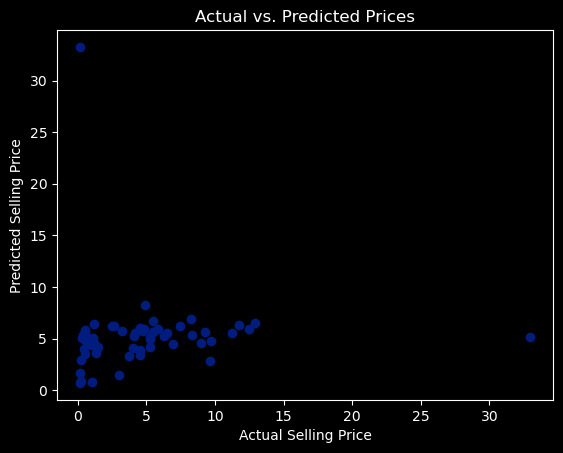

In [58]:
# Visualization (Optional):

# Plot the actual vs. predicted prices to see how well the model fits the data.

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Prices")
plt.show()